# Part 1 - Data Cleaning

## 1 Importing packages

In [1]:
import numpy as np
import pandas as pd

## 2 Read file and explore

About Data:

* Data is about a 12 questions survey for candies during Halloween.
* Q1 is if the surveyee is going to trick or treat himself
* Q6 is specific to a type of candy and how the surveyee finds it (JOY, DESPAIT, NEUTRAL)
* Q7 is other candy thats gives JOY to surveyee not mentioned in Q6 list
* Q8 is other candy thats gives DESPAIR to surveyee not mentioned in Q6 list
* Q10 is what color of the dress does the surveyee sees in first glance (black-blue OR white/golden)
* Q11 is what day surveyee likes? Friday OR Sunday
* Q12 is a Media question of a website that the suveyee would most likely check followed by co-ordinates of click.

*The data is taken from https://www.scq.ubc.ca/so-much-candy-data-seriously/*

In [2]:
candy = pd.read_csv('candyhierarchy2017.csv', header = 0, index_col = 0, na_values = '', encoding = 'ANSI')

## 3 Partial columns renaming

In [3]:
candy.columns

Index(['Q1: GOING OUT?', 'Q2: GENDER', 'Q3: AGE', 'Q4: COUNTRY',
       'Q5: STATE, PROVINCE, COUNTY, ETC', 'Q6 | 100 Grand Bar',
       'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Q6 | Any full-sized candy bar', 'Q6 | Black Jacks',
       'Q6 | Bonkers (the candy)',
       ...
       'Q8: DESPAIR OTHER', 'Q9: OTHER COMMENTS', 'Q10: DRESS', 'Unnamed: 113',
       'Q11: DAY', 'Q12: MEDIA [Daily Dish]', 'Q12: MEDIA [Science]',
       'Q12: MEDIA [ESPN]', 'Q12: MEDIA [Yahoo]', 'Click Coordinates (x, y)'],
      dtype='object', length=119)

In [4]:
candy = candy.rename(columns = {'Q1: GOING OUT?' : 'going_out', 'Q2: GENDER' : 'gender', 'Q3: AGE': 'age', 'Q4: COUNTRY' : 'country',
       'Q5: STATE, PROVINCE, COUNTY, ETC' : 'area', 'Q10: DRESS' : 'dress', 'Q11: DAY': 'day',
       'Q12: MEDIA [Daily Dish]' : 'media_DailyDish', 'Q12: MEDIA [Science]': 'media_Science', 'Q12: MEDIA [ESPN]' : 'media_ESPN',
       'Q12: MEDIA [Yahoo]': 'media_Yahoo'})

In [5]:
candy.columns

Index(['going_out', 'gender', 'age', 'country', 'area', 'Q6 | 100 Grand Bar',
       'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Q6 | Any full-sized candy bar', 'Q6 | Black Jacks',
       'Q6 | Bonkers (the candy)',
       ...
       'Q8: DESPAIR OTHER', 'Q9: OTHER COMMENTS', 'dress', 'Unnamed: 113',
       'day', 'media_DailyDish', 'media_Science', 'media_ESPN', 'media_Yahoo',
       'Click Coordinates (x, y)'],
      dtype='object', length=119)

In [6]:
candy['Unnamed: 113'].unique()

array([nan,
       'dress (https://survey.ubc.ca/media/assets/user/14372/storage/dress.png)'],
      dtype=object)

In [7]:
candy.drop(columns = ['Unnamed: 113', 'Click Coordinates (x, y)'], inplace = True)

In [8]:
candy.shape

(2460, 117)

## 4 Handling null values

I found a better way of handling nulls later. (Patched that code and commenting this one out)

'''
candy.shape

candy = candy.dropna(how = 'all')

candy = candy.dropna(thresh = 5, axis = 0) # I want at least 5 non-NaN values.

candy.drop(['Unnamed: 113','Click Coordinates (x, y)'], axis = 1, inplace = True)

'''

In [9]:
candy.dropna(subset = ['going_out', 'gender', 'age', 'country', 'area'], how = 'all', inplace = True)
candy.reset_index(drop = True, inplace = True)

In [10]:
candy.shape

(2435, 117)

## 5 Formating columns

### going out column

In [11]:
candy.going_out = candy.going_out.fillna('Not Sure')
candy.going_out.unique()

array(['No', 'Not Sure', 'Yes'], dtype=object)

### gender column

In [12]:
candy.gender.value_counts()

Male                  1467
Female                 839
I'd rather not say      83
Other                   30
Name: gender, dtype: int64

In [13]:
# Adding 11 NaN genders to type 3 - I'd rather not say seems to be the closest to unknown
candy[candy.gender == "I'd rather not say"].shape  #checking for spaces in text - found none

(83, 117)

In [14]:
candy.gender = candy.gender.fillna("I'd rather not say")
candy.gender.value_counts()

Male                  1467
Female                 839
I'd rather not say      99
Other                   30
Name: gender, dtype: int64

### country column

In [15]:
candy.country.unique()

array(['USA ', 'USA', 'us', 'usa', nan, 'canada', 'Canada', 'Us', 'US',
       'Murica', 'United States', 'uk', 'United Kingdom', 'united states',
       'Usa', 'United States ', 'United staes',
       'United States of America', 'UAE', 'England', 'UK', 'canada ',
       'Mexico', 'United states', 'u.s.a.', 'USAUSAUSA', 'america', '35',
       'france', 'United States of America ', 'U.S.A.', 'finland',
       'unhinged states', 'Canada ', 'united states of america',
       'US of A', 'Unites States', 'The United States', 'North Carolina ',
       'Unied States', 'Netherlands', 'germany', 'Europe', 'Earth', 'U S',
       'u.s.', 'U.K. ', 'Costa Rica', 'The United States of America',
       'unite states', 'U.S.', '46', 'cascadia', 'Australia',
       'insanity lately', 'Greece', 'USA? Hard to tell anymore..',
       "'merica", 'usas', 'Pittsburgh', '45', 'United State', '32',
       'France', 'australia', 'A', 'Can', 'Canae', 'New York',
       'Trumpistan', 'Ireland', 'United Sates', '

People are so creative !!

In [16]:
candy.country.value_counts(dropna = False).sort_values(ascending = False)

USA                               699
United States                     497
usa                               217
Canada                            179
Usa                               139
US                                126
USA                                73
United States of America           57
us                                 40
NaN                                39
united states                      38
United States                      37
canada                             34
United states                      19
Us                                 16
UK                                 13
United Kingdom                     13
United States of America           11
Canada                              8
U.S.                                8
U.S.A.                              7
Germany                             7
Netherlands                         6
Australia                           5
Japan                               5
united states of america            5
Scotland    

In [17]:
candy.country.isna().sum()

39

In [18]:
candy.country = candy.country.fillna('Unknown')

In [19]:
set([x for x in candy.country if 'u' in x])  # unique values with 'u'

{'Australia',
 'Europe',
 'I pretend to be from Canada, but I am really from the United States.',
 'Murica',
 'Pittsburgh',
 'South Korea',
 'South africa',
 'Trumpistan',
 'australia',
 'murrika',
 'soviet canuckistan',
 'subscribe to dm4uz3 on youtube',
 'u s a',
 'u.s.',
 'u.s.a.',
 'uk',
 'unhinged states',
 'unite states',
 'united States ',
 'united states',
 'united states of america',
 'united ststes',
 'us',
 'usa',
 'usas'}

In [20]:
USA = [x for x in candy.country if (('u' in x or 'U' in x) and 'ingdom' not in x\
     and 'urope' not in x and 'stralia' not in x and 'South Korea' not in x and 'South africa' not in x and 'uk' not in x)]

In [21]:
candy.country = candy.country.replace(to_replace = USA, value = 'USA')

In [22]:
candy.country.unique()

array(['USA', 'canada', 'Canada', 'uk', 'United Kingdom', 'England',
       'canada ', 'Mexico', 'america', '35', 'france', 'finland',
       'Canada ', 'North Carolina ', 'Netherlands', 'germany', 'Europe',
       'Earth', 'Costa Rica', '46', 'cascadia', 'Australia',
       'insanity lately', 'Greece', "'merica", '45', '32', 'France',
       'australia', 'A', 'Can', 'Canae', 'New York', 'Ireland', 'Korea',
       'California', 'Japan', 'South africa', 'Iceland', 'Germany',
       'Canada`', 'Scotland', 'Denmark', 'France ', 'Switzerland',
       'Ahem....Amerca', 'Scotland ', 'South Korea', 'New Jersey',
       'CANADA', 'Indonesia', 'America', 'The Netherlands', 'endland',
       'Atlantis', 'Alaska', 'N. America', 'Singapore', 'China', 'Taiwan',
       'Ireland ', 'hong kong', 'spain', 'Sweden', 'Hong Kong', 'Narnia',
       '1', 'United kingdom', "I don't know anymore", 'Fear and Loathing'],
      dtype=object)

In [23]:
candy.country = candy.country.replace(to_replace = ['america','Ahem....Amerca',"'merica",'North Carolina ','cascadia',\
                                                   'New York','A','California','New Jersey','America','Alaska',\
                                                    'N. America'], value = 'USA')

In [24]:
canada = [x for x in candy.country if 'anada' in x.strip() or 'ANADA' in x or 'Can' in x]

In [25]:
candy.country = candy.country.replace(to_replace = canada, value = 'Canada')

In [26]:
candy.country.value_counts()

USA                     2111
Canada                   227
United Kingdom            13
Germany                    7
Netherlands                6
Japan                      5
Australia                  5
Scotland                   4
Mexico                     4
germany                    3
Ireland                    3
Switzerland                3
Sweden                     2
uk                         2
Denmark                    2
China                      2
australia                  2
Hong Kong                  1
Korea                      1
1                          1
Europe                     1
United kingdom             1
endland                    1
insanity lately            1
finland                    1
Fear and Loathing          1
Costa Rica                 1
france                     1
hong kong                  1
45                         1
England                    1
35                         1
Scotland                   1
France                     1
Atlantis      

In [27]:
other = [x for x in candy.country.unique()]

In [28]:
other.remove('USA')
other.remove('Canada')

In [29]:
other

['uk',
 'United Kingdom',
 'England',
 'Mexico',
 '35',
 'france',
 'finland',
 'Netherlands',
 'germany',
 'Europe',
 'Earth',
 'Costa Rica',
 '46',
 'Australia',
 'insanity lately',
 'Greece',
 '45',
 '32',
 'France',
 'australia',
 'Ireland',
 'Korea',
 'Japan',
 'South africa',
 'Iceland',
 'Germany',
 'Scotland',
 'Denmark',
 'France ',
 'Switzerland',
 'Scotland ',
 'South Korea',
 'Indonesia',
 'The Netherlands',
 'endland',
 'Atlantis',
 'Singapore',
 'China',
 'Taiwan',
 'Ireland ',
 'hong kong',
 'spain',
 'Sweden',
 'Hong Kong',
 'Narnia',
 '1',
 'United kingdom',
 "I don't know anymore",
 'Fear and Loathing']

In [30]:
candy.country = candy.country.replace(to_replace = other, value = 'Other')

In [31]:
candy.country.value_counts()

USA       2111
Canada     227
Other       97
Name: country, dtype: int64

Country column got messy and I got so less done :( I am going to ignore area column, will check it out if my analysis wants me to

In [32]:
candy.columns

Index(['going_out', 'gender', 'age', 'country', 'area', 'Q6 | 100 Grand Bar',
       'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Q6 | Any full-sized candy bar', 'Q6 | Black Jacks',
       'Q6 | Bonkers (the candy)',
       ...
       'Q6 | York Peppermint Patties', 'Q7: JOY OTHER', 'Q8: DESPAIR OTHER',
       'Q9: OTHER COMMENTS', 'dress', 'day', 'media_DailyDish',
       'media_Science', 'media_ESPN', 'media_Yahoo'],
      dtype='object', length=117)

## 6 Datatype conversion

In [33]:
candy = candy.astype({'going_out':'category', 'gender':'category', 'country':'category', 'dress':'category', 'day':'category'})

In [36]:
candy.describe(include = 'category')

,going_out,gender,country,dress,day
count,2435,2435,2435,1714,1733
unique,3,4,3,2,2
top,No,Male,USA,White and gold,Friday
freq,2038,1467,2111,1080,1089


In [37]:
candy.shape

(2435, 117)

In [38]:
data = candy[candy.columns[-4:]]

In [39]:
data.shape

(2435, 4)

In [40]:
data.head(6)

,media_DailyDish,media_Science,media_ESPN,media_Yahoo
0,NaN,1.0,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,1.0,NaN,NaN
3,NaN,1.0,NaN,NaN
4,NaN,1.0,NaN,NaN
5,NaN,NaN,NaN,NaN


## 7 Wrting a function to convert 4 columns into 1 column

In [41]:
def melt1(row):
    for c in data.columns:
        if row[c] == 1:
            return c

In [42]:
new_col = data.apply(melt1, axis = 1)

In [43]:
candy['media_preference'] = new_col

In [44]:
candy.drop(columns = ['media_DailyDish','media_Science','media_ESPN','media_Yahoo'], inplace = True)

In [45]:
candy.media_preference.value_counts(dropna = False)

media_Science      1361
NaN                 824
media_ESPN           99
media_DailyDish      84
media_Yahoo          67
Name: media_preference, dtype: int64

In [46]:
#Dividing questions and other columns
'''
candy_options = [i for i in candy.columns if 'Q6' in i or 'Q7' in i or 'Q8' in i or 'Q9' in i]
other_columns = [i for i in candy.columns if 'Q6' not in i and 'Q7' not in i and 'Q8' not in i and 'Q9' not in i]
'''

personal_info_cols = candy.columns[:6]
questionare_cols = candy.columns[5:]

In [47]:
candy.columns

Index(['going_out', 'gender', 'age', 'country', 'area', 'Q6 | 100 Grand Bar',
       'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Q6 | Any full-sized candy bar', 'Q6 | Black Jacks',
       'Q6 | Bonkers (the candy)',
       ...
       'Q6 | Whatchamacallit Bars', 'Q6 | White Bread',
       'Q6 | Whole Wheat anything', 'Q6 | York Peppermint Patties',
       'Q7: JOY OTHER', 'Q8: DESPAIR OTHER', 'Q9: OTHER COMMENTS', 'dress',
       'day', 'media_preference'],
      dtype='object', length=114)

In [48]:
responses = len(questionare_cols) - candy[questionare_cols].isna().sum(axis = 1)

In [49]:
candy['responses'] = responses

This concludes the data cleaning part of the dataset

# Part 2 - EDA

In [50]:
candy_questions = [x for x in candy.columns if 'Q6' in x]

In [51]:
data = pd.DataFrame(candy[candy_questions])

In [52]:
data.shape

(2435, 103)

In [53]:
re = ['type_'+ str(x) for x in range(1,104)]

dic = {}
for i in range(len(data.columns)):
    dic[data.columns[i]] = re[i]

In [54]:
candy = candy.rename(columns = dic)
data = data.rename(columns = dic)

## Delete rows that have all NaNs

In [55]:
data = data.dropna(axis = 0, how = 'all')
data = data.reset_index(drop = True)

In [56]:
data.shape

(1799, 103)

In [57]:
data = data.rename(columns = dic)

In [58]:
data.head(4)

,type_1,type_2,type_3,type_4,type_5,type_6,type_7,type_8,type_9,type_10,...,type_94,type_95,type_96,type_97,type_98,type_99,type_100,type_101,type_102,type_103
0,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,...,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR
1,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,...,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR
2,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,...,JOY,JOY,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY
3,JOY,DESPAIR,JOY,NaN,NaN,NaN,MEH,MEH,DESPAIR,JOY,...,JOY,JOY,MEH,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,JOY


In [59]:
d = data.melt()

In [60]:
d.head(5)

,variable,value
0,type_1,MEH
1,type_1,MEH
2,type_1,JOY
3,type_1,JOY
4,type_1,JOY


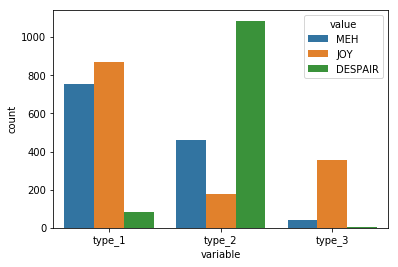

In [63]:
import seaborn as sns

sns.countplot(data = d[:4000], x = 'variable', hue = 'value')